<a href="https://colab.research.google.com/github/teomeo12/GoogleColabSelfDrivingCarData/blob/main/SelfDrivingCarData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/teomeo12/ImageDataSelfDrivingCar


fatal: destination path 'ImageDataSelfDrivingCar' already exists and is not an empty directory.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential #Sequential model
from keras.layers import Dense #Dense layer
from keras.optimizers import Adam #Adam optimizer
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpig
from imgaug import augmenters as iaa

In [ ]:
datadir = "ImageDataSelfDrivingCar"
columns = ["center","left","right","steering","throttle","reverse", "speed"]
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)  # reading data from csv file
# reading data from csv file
pd.set_option('display.max_columns',7)#display all the columns
print(data.head())#print the first 5 rows

                                              center  \
0  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   
1  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   
2  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   
3  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   
4  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   

                                                left  \
0  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   
1  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   
2  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   
3  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   
4  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...   

                                               right  steering  throttle  \
0  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...       0.0       0.0   
1  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...       0.0       0.0   
2  C:\Users\teomeo\Desktop\aYEAR4\ST\CA2\imagesFo...       0.0       0.0   
3  C:\Users\teomeo\Des

In [ ]:

def path_leaf(path):
  head,tail = ntpath.split(path)
  return tail

In [ ]:
data['center'] = data['center'].apply(path_leaf)#apply the function to the center column
data['left'] = data['left'].apply(path_leaf)#apply the function to the left column
data['right'] = data['right'].apply(path_leaf)#apply the function to the right column

In [ ]:
num_bins = 25
samples_per_bin = 250#we have 200 images per bin meaning 200 images per 0.08 degree angle
hist, bins = np.histogram(data['steering'],num_bins)#histogram of the steering column with 25 bins
print(bins)#print the bins

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


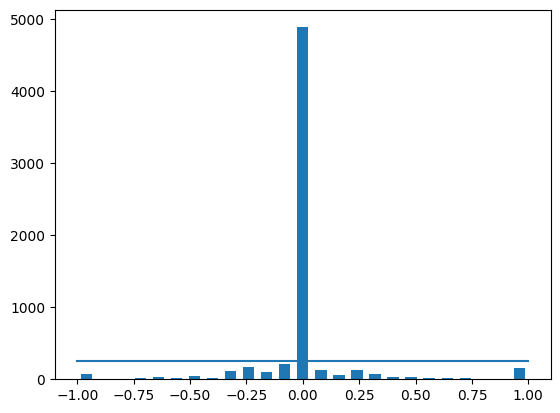

In [ ]:
center = (bins[:-1]+bins[1:])*0.5#center the bins take the first bin and the second bin and divide by 2 the purpurse is to have bins in the middle
plt.bar(center,hist,width=0.05)#plot the histogram
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))#plot the straight line
print(center)#print the center

In [ ]:
#we have to get rid of the 0 degree angles or balance the zeros with the other angles and we
remove_list = []
print('total data:',len(data))

total data: 6365


In [ ]:
#we have to balance the data as we have a lot of 0 degree angles so we have to get rid of them or balance them
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    #if the steering angle is between the bin range
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  #shuffle the list
  list_ = shuffle(list_)
  #cut the list to 200 samples per bin
  list_ = list_[samples_per_bin:]
  #add the list to the remove list
  remove_list.extend(list_)

In [ ]:
#remove the data from the dataframe
print('removed:',len(remove_list))

removed: 4637


In [ ]:
#lets remove the data from the dataframe
data.drop(data.index[remove_list],inplace=True)
#print the remaining data
print('remaining:',len(data))

remaining: 1728


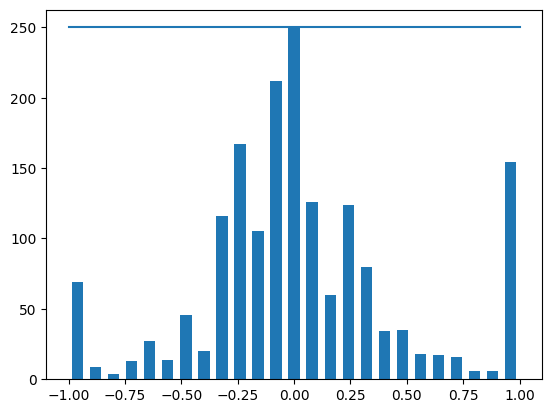

In [ ]:
#plot the histogram again
hist, _ = np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))


#what can we say for the data
#we have 0 degree angles, we have left and right angles the shape is like a normal distribution ans seem to be realestic data
#and we shoud use this data to train our model roughly 70 percent for training and 30 percent for validation or similar or 80/20 or 75/25
#we have to split the data to training and validation data

In [ ]:
#training and validation split
print(data.iloc[1])#print the first row from the data

center      center_2023_11_27_13_43_57_158.jpg
left          left_2023_11_27_13_43_57_158.jpg
right        right_2023_11_27_13_43_57_158.jpg
steering                                   0.0
throttle                                   1.0
reverse                                    0.0
speed                                  30.1899
Name: 66, dtype: object


In [ ]:
#function to load the images and steering data, passing the data directory and the data frame as df
def load_img_steering(datadir,df):
  image_path = []
  steering = []
  for i in range(len(data)):
    #get the image path
    indexed_data = data.iloc[i]
    #get the center,left and right images, this are the paths to the images, this are the indexes 0,1,2 in the csv file
    center,left,right = indexed_data[0],indexed_data[1],indexed_data[2]
    #append the image path to the image path list
    image_path.append(os.path.join(datadir,center.strip()))
    #append the steering angle to the steering list the index is 3 cuz the steering angle is in the 4th column in the csv file
    steering.append(float(indexed_data[3]))
  #convert the lists to numpy arrays
  image_paths = np.asarray(image_path)
  #convert the lists to numpy arrays
  steerings = np.asarray(steering)
  return image_paths,steerings

In [ ]:
#load the images and steering data, passing the data directory and the data frame as data
image_paths, steerings = load_img_steering(datadir + '/IMG',data)
#print the image paths and the steering angles, train_test_split is a function from sklearn for splitting the data with random state 6
X_train,X_valid,y_train,y_valid = train_test_split(image_paths,steerings,test_size=0.2,random_state=6)

In [ ]:
#print the shape of the training and validation data
print(f'Training Samples: {len(X_train)}, Validation Samples: {len(X_valid)}')

Training Samples: 1382, Validation Samples: 346


Text(0.5, 1.0, 'Validation set')

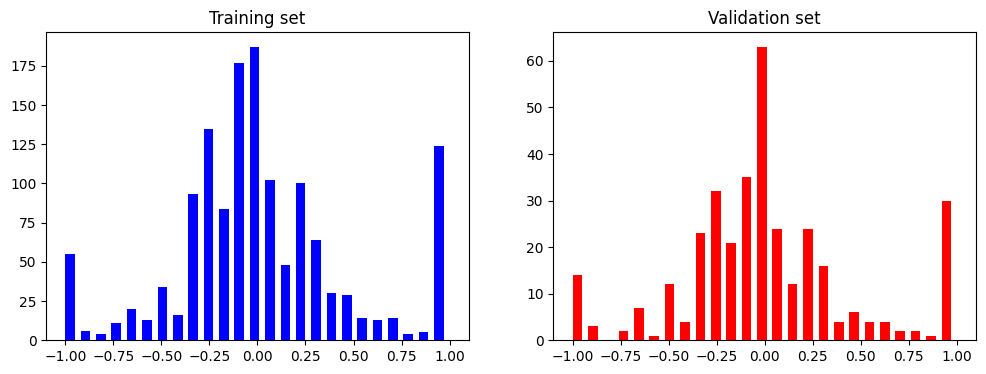

In [ ]:
#plot the histogram for the training and validation data
fig, axes = plt.subplots(1,2,figsize=(12,4))
#plot the histogram for the training data
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('Training set')
#plot the histogram for the validation data
axes[1].hist(y_valid,bins=num_bins,width=0.05,color='red')
axes[1].set_title('Validation set')


#does the function does good job how the distribution similar to the training and validation data
#if we dont like hte output we can change the random state to get different output and run it again

In [ ]:
#function to augment the image for the model
def zoom(image):
    zoom = iaa.Affine(scale=(1,1.3)) # zoom from 100% to 130% what affine means is that it will zoom the image and then it will shift the image
    image = zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'Zoomed Image')

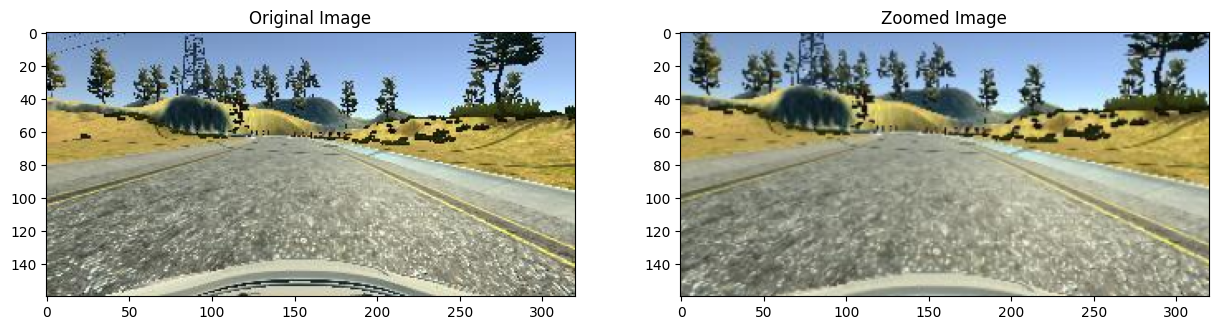

In [ ]:
image = image_paths[random.randint(0,100)] #randomly select an image from the dataset
original_image = mpig.imread(image) #read the image
zoomed_image = zoom(original_image) #zoom the image
fig, axs = plt.subplots(1,2, figsize=(15,10))#plot the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')



In [ ]:
#function to pan the image
def pan(image):
    pan = iaa.Affine(translate_percent={'x':(-0.1,0.1), 'y':(-0.1,0.1)})
    image = pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Zoomed Image')

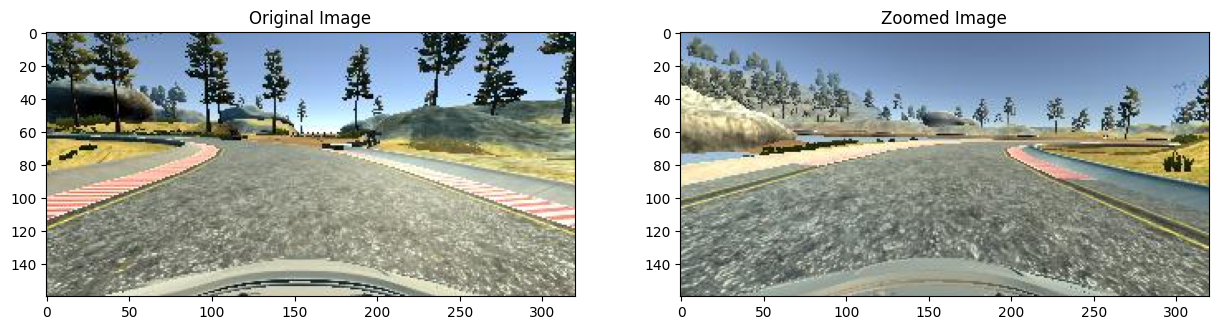

In [ ]:
image = image_paths[random.randint(0,100)] #randomly select an image from the dataset
panned_image = mpig.imread(image) #read the image
zoomed_image = zoom(original_image) #zoom the image
fig, axs = plt.subplots(1,2, figsize=(15,10))#plot the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Zoomed Image')

In [ ]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2,1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'brightened Image')

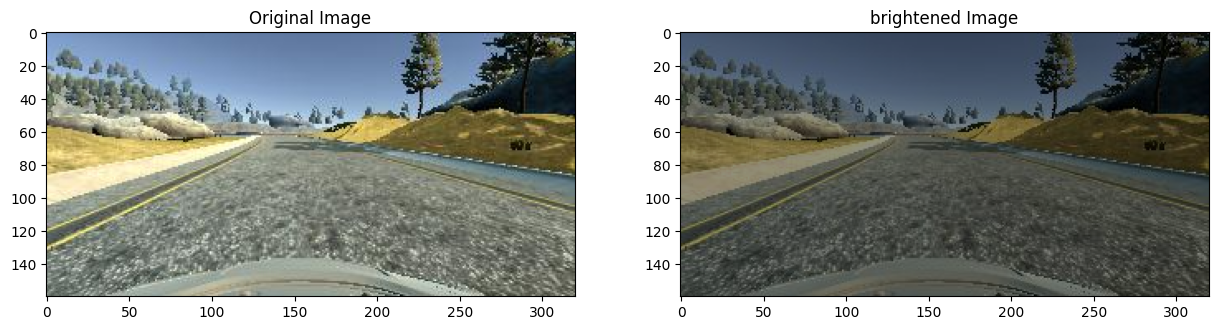

In [ ]:
#function to flip the image
image = image_paths[random.randint(0,100)] #randomly select an image from the dataset
original_image = mpig.imread(image) #read the image
brightened_image = img_random_brightness(original_image) #zoom the image
fig, axs = plt.subplots(1,2, figsize=(15,10))#plot the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(brightened_image)
axs[1].set_title('brightened Image')

In [ ]:
#function to flip the image on y axis
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)#1 flips the image on y azis
    steering_angle = -steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'Original Image -Steering angle0.2')

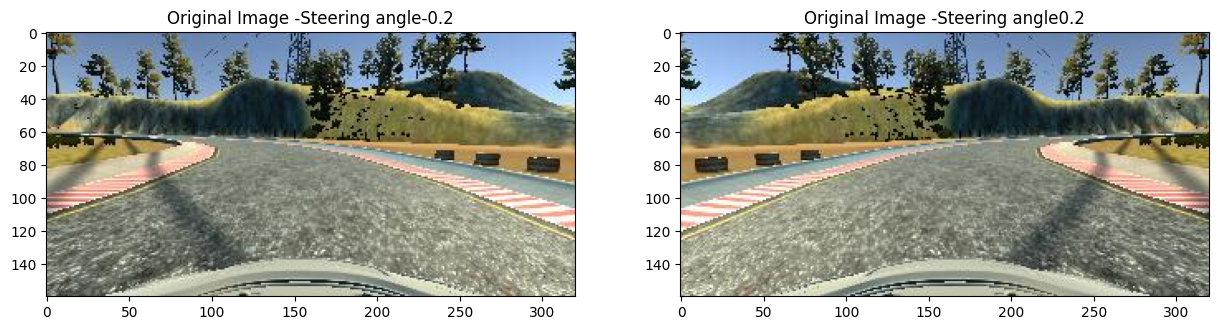

In [ ]:
random_index = random.randint(0,1000)
image = image_paths[random_index] #randomly select an image from the dataset
steering_angle = steerings[random_index]
original_image = mpig.imread(image) #read the image
flipped_image,flipped_steering_angle = img_random_flip(original_image,steering_angle) #zoom the image
fig, axs = plt.subplots(1,2, figsize=(15,10))#plot the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image -' +'Steering angle'+ str(steering_angle))
axs[1].imshow(flipped_image)
axs[1].set_title('Original Image -' +'Steering angle'+ str(flipped_steering_angle))

In [ ]:
def random_augment(image,steering_angles):
    image = mpig.imread(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image,steering_angles = img_random_flip(image,steering_angles)
    return image, steering_angle

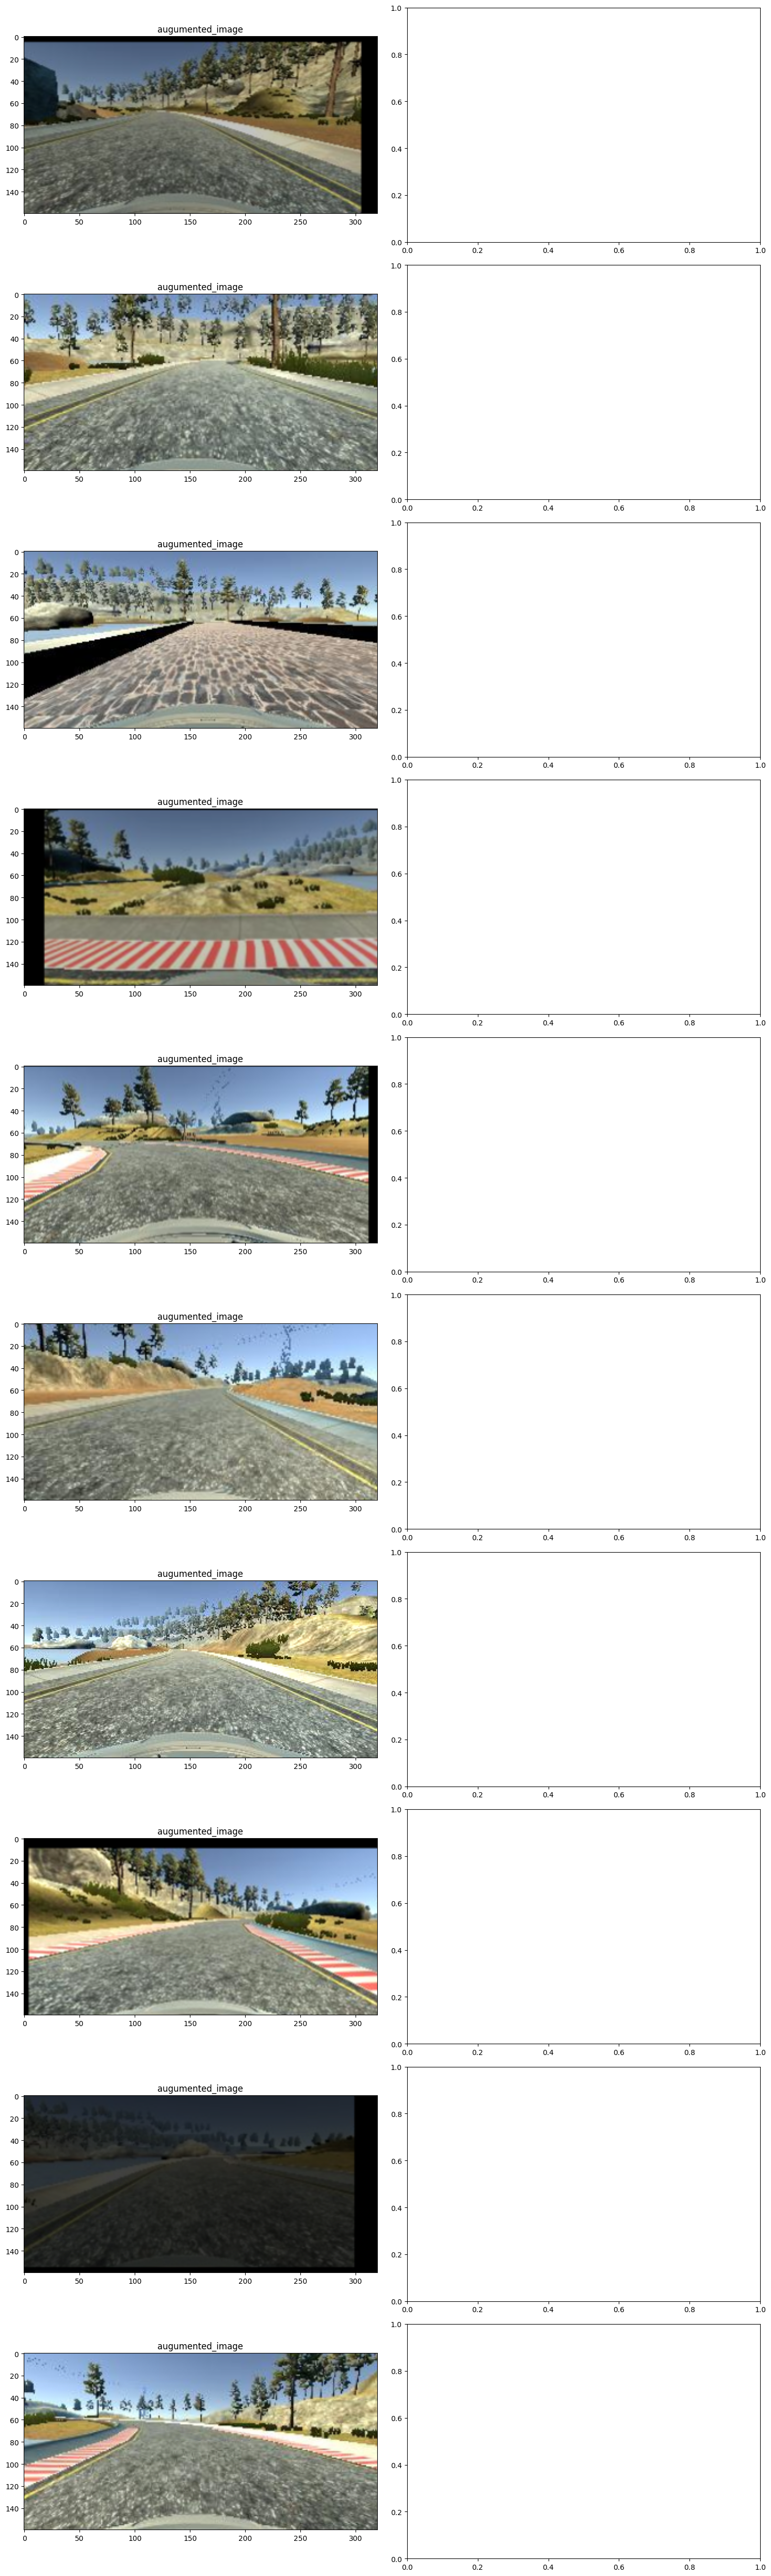

In [ ]:
ncols = 2
nrows =10
fig, axs =plt.subplots(nrows,ncols, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    rand_num = random.randint(0,len(image_paths)-1)
    random_image = image_paths[rand_num]
    random_steering = steerings[rand_num]
    originaimage = mpig.imread(random_image)
    augumented_image, steering_angles = random_augment(random_image,random_steering)
    axs[i][0].imshow(originaimage)
    axs[i][0].set_title("orignal")
    axs[i][0].imshow(augumented_image)
    axs[i][0].set_title("augumented_image")

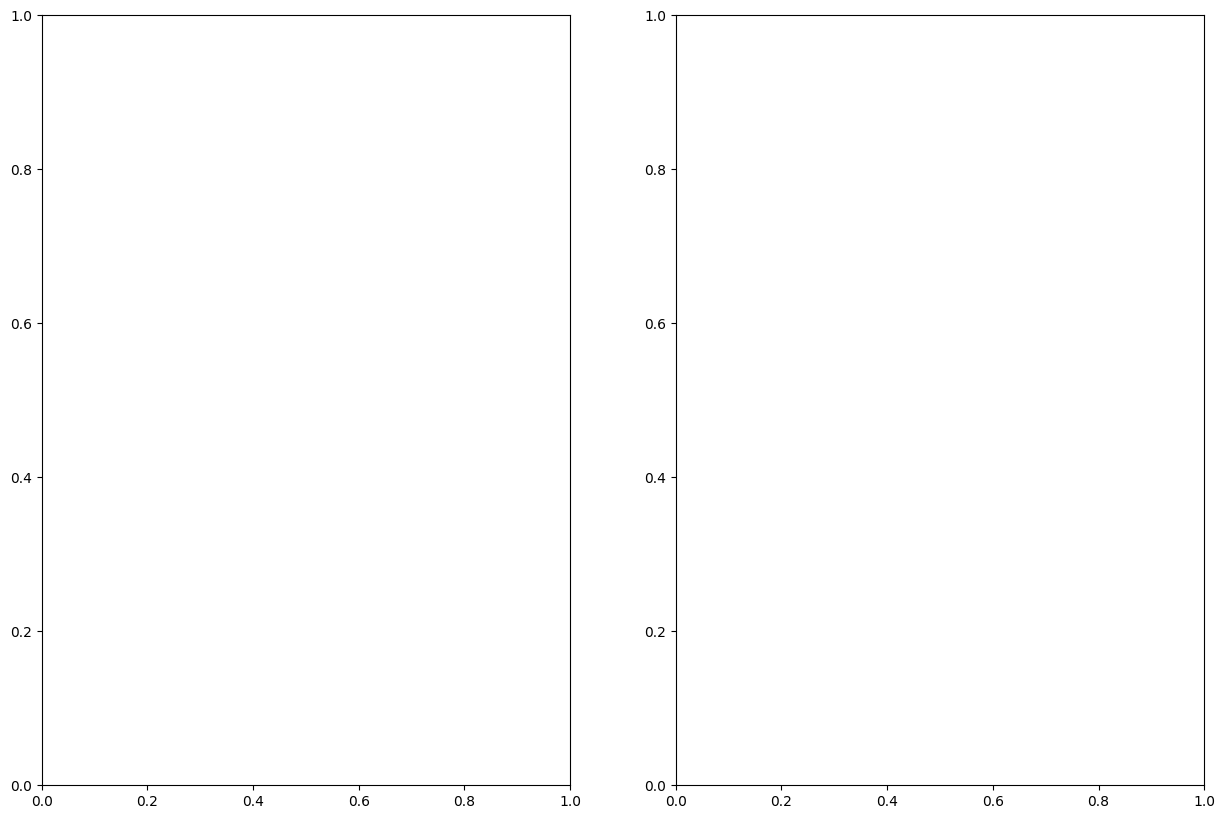

In [ ]:
image = image_paths[random.randint(0,100)] #randomly select an image from the dataset
original_image = mpig.imread(image) #read the image
zoomed_image = zoom(original_image) #zoom the image
fig, axs = plt.subplots(1,2, figsize=(15,10))#plot the image

In [ ]:
def img_preprocess(img):
  #convert the image to yuv color space
    img = mpig.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    #crop the image
    img = img[60:135,:,:]
    #resize the image
    img = cv2.resize(img,(200,66))
    #normalize the image
    img = img/255
    return img



In [ ]:
#function to preprocess the image with batch generator for the model
def batch_generator(image_paths, steering_angles, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []
        for i in range(batch_size):
            random_index = random.randint(0,len(image_paths)-1)
            if istraining: #if training is true then augment the image
                im, steering = random_augment(image_paths[random_index], steering_angles[random_index])
            else:
                im = mpig.imread(image_paths[random_index])
                steering = steering_angles[random_index]
            im = img_preprocess_no_imread(im)
            batch_img.append(im)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1)) #1 is the batch size and 1 is the training the 1s means that we are augmenting the image
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0)) #0 is the batch size and 0 is the training the 0s means that we are not augmenting the image

fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

NameError: ignored

In [ ]:
def img_preprocess_no_imread(img):
  #convert the image to yuv color space
    img = mpig.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    #crop the image
    img = img[60:135,:,:]
    #resize the image
    img = cv2.resize(img,(200,66))
    #normalize the image
    img = img/255
    return img

In [ ]:
#or we can cv 2 here
#processing the image
def img_preprocess(img):
  #convert the image to yuv color space
    img = cv2.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    #crop the image
    img = img[60:135,:,:]
     #blur the image with gaussian blur to remove noise in the image
    img =cv2.GaussianBlur(img,(3,3),0)
    #resize the image
    img = cv2.resize(img,(200,66))
    #normalize the image
    img = img/255
    return img

In [ ]:

X_train =np.array(list(map(img_preprocess,X_train)))
X_valid =np.array(list(map(img_preprocess,X_valid)))


In [ ]:
plt.imshow(X_train[random.randit(0,len(X_train)-1)])

In [ ]:
image = image_paths[1493]
original_image = cv2.imread(image)
preprocessed_image = img_preprocess(image)

In [ ]:
#plot the images
fig,axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
#plot the original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
#plot the preprocessed image
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')

In [ ]:
def nvidia_model():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(24, kernel_size=(5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Conv2D(36, kernel_size=(5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(48, kernel_size=(5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='elu'))

    # Dropout layer
    model.add(Dropout(0.5))

    # Flattening the outputs from the convolutional layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='elu'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer)

    return model


In [ ]:
model = nvidia_model()
print(model.summary())

In [ ]:

history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),batch_size=100,verbose=1,shuffle=1)

In [ ]:
#train the model plot the loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])

In [ ]:
#when we train the mmodel we have to save the model and use it later
model.save('alpha.h5')

In [ ]:
from google.colab import files
files.download('alpha.h5')